<blockquote>
    <h1>Exercise 6.10</h1>
        <p>We have seen that as the number of features used in a model increases, the training error will necessarily decrease, but the test error may not. We will now explore this in a simulated data set.</p>
    <ol>
        <li>
            Generate a data set with $p = 20$ features, $n = 1,000$ observations, and an associated quantitative response vector generated according to the model
            $$
                Y = X \beta + \epsilon \,,
            $$
            where $\beta$ has some elements that are exactly equal to zero.
        </li>
        <li>Split your data set into a training set containing $100$ observations and a test set containing $900$ observations.</li>
        <li>Perform best subset selection on the training set, and plot the training set MSE associated with the best model of each size.</li>
        <li>Plot the test set MSE associated with the best model of each size.</li>
        <li>For which model size does the test set MSE take on its minimum value? Comment on your results. If it takes on its minimum value for a model containing only an intercept or a model containing all of the features, then play around with the way that you are generating the data in 1 until you come up with a scenario in which the test set MSE is minimized for an intermediate model size.</li>
        <li>How does the model at which the test set MSE is minimized compare to the true model used to generate the data? Comment on the coefficient values.</li>
        <li>Create a plot displaying $\sqrt{ \sum_{j=1}^p \left( \beta_j - \hat{\beta}_j^r \right)^2 }$</li>
    </ol>
</blockquote>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# https://stackoverflow.com/questions/34398054/ipython-notebook-cell-multiple-outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import itertools
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
def fit_linear_reg(df_X, Y):
    # Fit linear regression model and return RSS values
    model = LinearRegression(fit_intercept=False)
    _ = model.fit(df_X, Y)
    Y_pred = model.predict(df_X)    
    return mean_squared_error(Y, Y_pred)

<h3>Exercise 6.10.1</h3>
<blockquote>
    <i>
        Generate a data set with $p = 20$ features, $n = 1,000$ observations, and an associated quantitative response vector generated according to the model
        $$
            Y = X \beta + \epsilon \,,
        $$
        where $\beta$ has some elements that are exactly equal to zero.
    </i>
</blockquote>

In [3]:
np.random.seed(1)
p = 20
n = 1000
X = np.random.normal(size=int(n*p), loc=5, scale=2.5).reshape((n, p))
beta = np.array(
    [
        15,   0,  50,   0,   0,   0,   3.5,   0,   0, 37, 
        0, 0, -25, 31.2, 18.7, 0, -15.5, 29.1, 0, 2.5
    ]
)
gaussian_noise = np.random.normal(size=n, loc=0, scale=1)
Y = X @ beta + gaussian_noise

features_lst = np.linspace(start=1, stop=p, num=p, dtype=int)
df_beta = pd.DataFrame({
    'coefficient': features_lst,
    'value': beta
})
df_beta = df_beta.set_index('coefficient')
df_beta

,value
coefficient,
1,15.0
2,0.0
3,50.0
4,0.0
5,0.0
6,0.0
7,3.5
8,0.0
9,0.0


<h3>Exercise 6.10.2</h3>
<blockquote>
    <i>Split your data set into a training set containing $100$ observations and a test set containing $900$ observations.</i>
</blockquote>

In [4]:
df_X = pd.DataFrame(X, columns=features_lst)
df_X_train, df_X_test = train_test_split(df_X, test_size=0.1, random_state=0)
Y_train, Y_test = train_test_split(Y, test_size=0.1, random_state=0)

<h3>Exercise 6.10.3</h3>
<blockquote>
    <i>Perform best subset selection on the training set, and plot the training set MSE associated with the best model of each size.</i>
</blockquote>

,variables,training MSE
number of predictors,,
1,[3],72328.7
2,"[3, 10]",29411.5
3,"[3, 10, 18]",15566.5
4,"[3, 10, 14, 18]",8690.81
5,"[3, 10, 13, 14, 18]",5813.29
6,"[3, 10, 13, 14, 15, 18]",3032.94
7,"[1, 3, 10, 13, 14, 15, 18]",1802.47
8,"[1, 3, 10, 13, 14, 15, 17, 18]",143.346
9,"[1, 3, 7, 10, 13, 14, 15, 17, 18]",44.0379


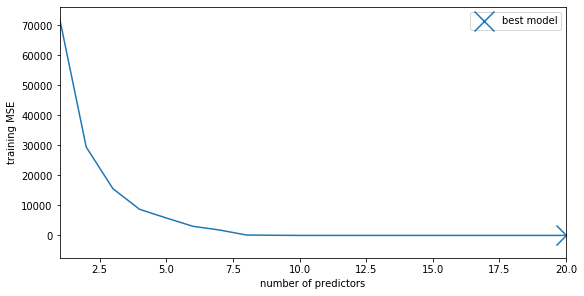

In [5]:
best_submodels = {}
for k in range(1, p + 1):
    MSE_min_subset = float('+inf')
    #Looping over all possible combinations: from p choose k
    for descriptiveColumns in itertools.combinations(features_lst, k):
        descriptiveColumns = list(descriptiveColumns)
        MSE = fit_linear_reg(df_X_train[descriptiveColumns], Y_train)
        if MSE < MSE_min_subset:
            MSE_min_subset = MSE
            descriptiveColumns_best_subset = descriptiveColumns
        
    best_submodels[k] = (descriptiveColumns_best_subset, MSE_min_subset)
    
df_best_submodels = pd.DataFrame(best_submodels, index=['variables', 'training MSE']).T
df_best_submodels.index.name = 'number of predictors'
df_best_submodels

# df_best_submodels
df_best_MSE = df_best_submodels[df_best_submodels['training MSE'] == df_best_submodels['training MSE'].min()]

numberOfSubplots = 1
fig, ax1 = plt.subplots(1, numberOfSubplots, constrained_layout=True, figsize=(8*numberOfSubplots, 4))

_ = df_best_submodels['training MSE'].plot(ax=ax1, label='')
_ = ax1.scatter(x=df_best_MSE.index[0], y=df_best_MSE['training MSE'].iloc[0], marker='x', s=400, label='best model')
_ = ax1.set_ylabel('training MSE')
_ = ax1.legend()

<h3>Exercise 6.10.4</h3>
<blockquote>
    <i>Plot the test set MSE associated with the best model of each size.</i>
</blockquote>

,variables,training MSE,testing MSE
number of predictors,,,
1,[3],72328.7,82482.5
2,"[3, 10]",29411.5,38562.9
3,"[3, 10, 18]",15566.5,20638.7
4,"[3, 10, 14, 18]",8690.81,9496.21
5,"[3, 10, 13, 14, 18]",5813.29,5740.33
6,"[3, 10, 13, 14, 15, 18]",3032.94,2141.28
7,"[1, 3, 10, 13, 14, 15, 18]",1802.47,1585.54
8,"[1, 3, 10, 13, 14, 15, 17, 18]",143.346,116.926
9,"[1, 3, 7, 10, 13, 14, 15, 17, 18]",44.0379,45.6977


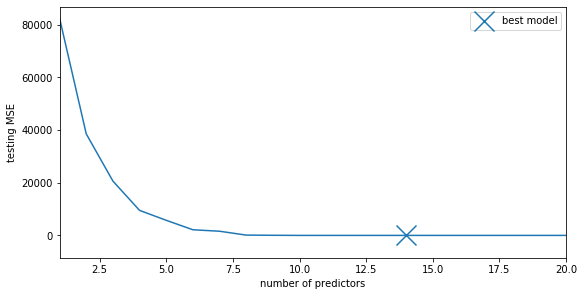

In [6]:
for k, (descriptiveColumns_best_subset, MSE_train) in best_submodels.items():
    if descriptiveColumns_best_subset == [0]:  # null model
        Y_test_mean = np.mean(Y_test)
        MSE_test = np.sum((Y_test - Y_test_mean)**2) / Y_test.shape[0]
        best_submodels[k] = (descriptiveColumns_best_subset, MSE_train, MSE_test)
        continue

    
    model = LinearRegression(fit_intercept=False)
    _ = model.fit(df_X_train[descriptiveColumns_best_subset], Y_train)
    
    Y_pred = model.predict(df_X_test[descriptiveColumns_best_subset])
    MSE_test = mean_squared_error(Y_pred, Y_test)
    best_submodels[k] = (descriptiveColumns_best_subset, MSE_train, MSE_test)


df_best_submodels = pd.DataFrame(best_submodels, index=['variables', 'training MSE', 'testing MSE']).T
df_best_submodels.index.name = 'number of predictors'
df_best_submodels

# df_best_submodels
df_best_MSE = df_best_submodels[df_best_submodels['testing MSE'] == df_best_submodels['testing MSE'].min()]
numberOfSubplots = 1
fig, ax1 = plt.subplots(1, numberOfSubplots, constrained_layout=True, figsize=(8*numberOfSubplots, 4))

_ = df_best_submodels['testing MSE'].plot(ax=ax1, label='')
_ = ax1.scatter(x=df_best_MSE.index[0], y=df_best_MSE['testing MSE'].iloc[0], marker='x', s=400, label='best model')
_ = ax1.set_ylabel('testing MSE')
_ = ax1.legend()

<h3>Exercise 6.10.5</h3>
<blockquote>
    <i>For which model size does the test set MSE take on its minimum value? Comment on your results. If it takes on its minimum value for a model containing only an intercept or a model containing all of the features, then play around with the way that you are generating the data in 1 until you come up with a scenario in which the test set MSE is minimized for an intermediate model size.</i>
</blockquote>

<h3>Exercise 6.10.6</h3>
<blockquote>
    <i>How does the model at which the test set MSE is minimized compare to the true model used to generate the data? Comment on the coefficient values.</i>
</blockquote>

In [9]:
descriptiveColumns = df_best_submodels[df_best_submodels['testing MSE'] == df_best_submodels['testing MSE'].min()]['variables'].to_numpy()[0]
model = LinearRegression()
_ = model.fit(df_X[descriptiveColumns], Y)
estimates = pd.DataFrame({
    'coefficient': descriptiveColumns,
    'estimated value': model.coef_
})
estimates = estimates.set_index('coefficient')
df_beta[df_beta['value'] != 0].merge(estimates, how='outer', left_index=True, right_index=True).fillna(0)

,value,estimated value
coefficient,,
1,15.0,15.014445
3,50.0,50.012537
4,0.0,-0.014646
5,0.0,-0.014460
7,3.5,3.478575
9,0.0,0.031566
10,37.0,36.985042
12,0.0,-0.023792
13,-25.0,-24.970189


<h3>Exercise 6.10.7</h3>
<blockquote>
    <i>Create a plot displaying $\sqrt{ \sum_{j=1}^p \left( \beta_j - \hat{\beta}_j^r \right)^2 }$</i>
</blockquote>

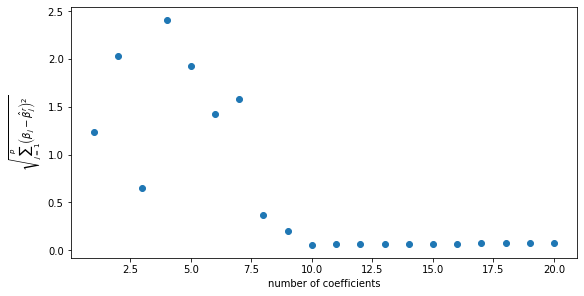

In [8]:
plot_data = []
for k, (descriptiveColumns_best_subset, MSE_train, MSE_test) in best_submodels.items():
    beta_indices = np.array(descriptiveColumns_best_subset, dtype=int) - 1
    coeffs = beta[beta_indices]
    
    model = LinearRegression()
    _ = model.fit(df_X[descriptiveColumns_best_subset], Y)
    coeffs_hat = model.coef_
    
    plot_data.append([k, np.sum((coeffs - coeffs_hat)**2)**0.5])

plot_data = np.array(plot_data)

numberOfSubplots = 1
fig, ax1 = plt.subplots(1, numberOfSubplots, constrained_layout=True, figsize=(8*numberOfSubplots, 4))
_ = ax1.scatter(plot_data[:, 0], plot_data[:, 1])
_ = ax1.set_xlabel('number of coefficients')
_ = ax1.set_ylabel(r'$\sqrt{ \sum_{j=1}^p \left( \beta_j - \hat{\beta}_j^r \right)^2 }$')